In [1]:
import scipy.io as scio
import numpy as np
from pylab import *
dataFile='hw1_images.mat'
data=scio.loadmat(dataFile)
origImg=data['origImg']
noisyImg=data['noisyImg']

In [2]:
def compute_E(newImg,noisyImg,h,beta,v,x,y):
    cur_minus=h-beta*(-new_up(x,y,newImg)-new_bot(x,y,newImg)-new_left(x,y,newImg)-new_right(x,y,newImg))-\
                    v*(-noisyImg[x][y])
    cur_plus=h-beta*(+new_up(x,y,newImg)+new_bot(x,y,newImg)+new_left(x,y,newImg)+new_right(x,y,newImg))-\
                    v*(+noisyImg[x][y])
    if cur_minus>cur_plus:
        return 1
    else:
        return -1

In [3]:
def new_up(x,y,newImg):
    if x==0:
        return 0
    else:
        return newImg[x-1][y]

In [4]:
def new_bot(x,y,newImg):
    if x==newImg.shape[0]-1:
        return 0
    else:
        return newImg[x+1][y]

In [5]:
def new_left(x,y,newImg):
    if y==0:
        return 0
    else:
        return newImg[x][y-1]

In [6]:
def new_right(x,y,newImg):
    if y==newImg.shape[1]-1:
        return 0
    else:
        return newImg[x][y+1]

In [13]:
h=0
beta=1
v=15
newImg=noisyImg
error_rate=1
for i in range(5):
    for row in range(origImg.shape[0]):
        for col in range(origImg.shape[1]):
            newImg[row][col]=compute_E(newImg,noisyImg,h,beta,v,row,col)
    print("i is:",i)
    wrong_pixels= np.sum(np.sum(origImg!=newImg))
    if (error_rate-wrong_pixels/(newImg.shape[0]*newImg.shape[1]))<0.001:
        break
    else:
        error_rate=wrong_pixels/(newImg.shape[0]*newImg.shape[1])

i is: 0
i is: 1


0.004678571428571429

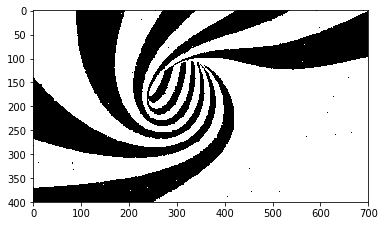

In [14]:

gray()

imshow(newImg)
error_rate

In [103]:

# total_num_pixels = size(origImg,1)*size(origImg,2);
# fprintf('The error rate is %g percent.\n',100*(num_pixels_wrong/total_num_pixels));

0.004521428571428571